# Google Drive Loading
It requires to mount the directory first
Please put the data in the same directory as below to avoid probems

In [2]:
!pip install sklearn

     |████████████████████████████████| 5.3MB 102kB/s eta 0:00:01
     |████████████████████████████████| 24.7MB 4.8MB/s eta 0:00:01
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from sklearn.preprocessing import OneHotEncoder

###
  # Prints and image
###
import matplotlib.pyplot as plt
def showIMG(data):
  plt.imshow(data)

(xt,yt), (xv,yv) = load_data()
enc = OneHotEncoder(categories='auto')
enc.fit(yt)

yt = enc.transform(yt).toarray()
yv = enc.transform(yv).toarray()

170500096/170498071 [==============================] - 523s 3us/step


(50000, 32, 32, 3) (50000, 10)


50000

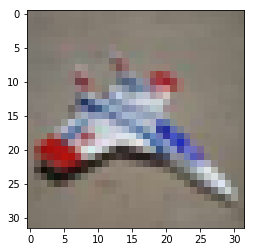

In [4]:
print(xt.shape, yt.shape)
train_items = xt.shape[0]
test_items  = xv.shape[0]
showIMG(xt[30])
len(yt)
# showIMG(xv[0])

# Task 1

## Build a CNN architecture to classify this data-set

Hint: https://www.isip.uni-luebeck.de/fileadmin/uploads/tx_wapublications/hertel_ijcnn_2015.pdf

Run for 50 epochs and report your results.


# Response
Installing colab to visualize training


In [3]:
!pip install tensorboardcolab

In [4]:
from tensorboardcolab import TensorBoardColab
tbc=TensorBoardColab()
logsPath = "./Graph"

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://935aa5e3.ngrok.io


In [5]:
logsPath = "./Graph"

# First try
In this first atempt no data augmentation will be used, and a simple CNN will be used.
The model takes the 32x32 images as input.

In [5]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name="Features")
y = tf.placeholder(tf.float32, [None, 10], name="Labels")

model = tf.layers.Conv2D(64,[6,6],padding="same",activation=tf.nn.relu, name="1_Conv")(x)
model = tf.layers.MaxPooling2D((2,2), (2,2), name="1_Pool")(model)
model = tf.layers.Dropout(0.8, name="1_Dropout")(model)
model = tf.layers.Conv2D(64,[3,3],padding="same",activation=tf.nn.relu, name="2_Conv")(model)
model = tf.layers.MaxPooling2D((2,2), (2,2), name="2_Pool")(model)
model = tf.layers.Dropout(0.8, name="2_Dropout")(model)
model = tf.layers.BatchNormalization(name="batchNormalization")(model)
model = tf.layers.Flatten(name="Flatten")(model)
model = tf.layers.Dense(280, name="1_dense")(model)
model = tf.layers.Dense(10, name="2_dense")(model)

# loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=model))
tf.summary.histogram("Loss", cost)

# optimizer
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')
tf.summary.histogram("Accuracy", accuracy)

epochs = 50
batchSize = 1000
n_batches = train_items // batchSize
saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
histT = []
histV = []
print("Begin Session")
with tf.Session() as sess:
#   if tf.gfile.Exists(logsPath+"model.ckpt"):
#     saver.restore(sess, logsPath+"model.ckpt")
#     print("Model restored!")
#   train_writer = tf.summary.FileWriter(logsPath, sess.graph)
  sess.run(tf.global_variables_initializer())
  print("Variables Initialized")
    
  counter = 0
  for epoch in range(epochs):
    print("Start Epoch {:>2}".format(epoch + 1))
    for i in range(1, n_batches + 1):
      print(".", end="")
      counter += 1
      merge = tf.summary.merge_all()
      summary, _ = sess.run([merge, optimizer],
                            feed_dict={x: xt[i*batchSize:(i+1)*batchSize],
                                       y: yt[i*batchSize:(i+1)*batchSize]})
    train_writer.add_summary(summary, counter)
    print("Epoch {:>2}:  ".format(epoch + 1), end="\n")
    vloss, vacc = sess.run([cost,accuracy],
                            feed_dict={x: xv,
                                       y: yv})
    tloss, tacc = sess.run([cost,accuracy],
                             feed_dict={x: xt,
                                        y: yt})
    print("Validation Loss: {:>8.4f}, Validation Accuracy: {:>8.6f}".format(vloss, vacc))
    print("Training   Loss: {:>8.4f}, Training   Accuracy: {:>8.6f}".format(tloss, tacc))
    histT.append(tacc)
    histV.append(vacc)

    # Save Model
  train_writer.flush()
#   save_path = saver.save(sess, './image_classification')

Begin Session
Variables Initialized
Start Epoch  1
...............

In [0]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
plt.plot(histT, label='TEST')
plt.plot(histV, label='TRAIN')
plt.legend()
plt.show()


# A better architecture. 
The following architecture has been observed to reach an accuracy of 90%:

- https://arxiv.org/abs/1502.03167
- http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

In [0]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name="Features")
y = tf.placeholder(tf.float32, [None, 10], name="Labels")

model = tf.layers.Conv2D(32,[3,3],padding="same",activation=tf.nn.elu, name="1_Conv")(x)
model = tf.layers.BatchNormalization(name="1_batchNormalization")(model)
model = tf.layers.Conv2D(32,[3,3],padding="same",activation=tf.nn.elu, name="2_Conv")(model)
model = tf.layers.BatchNormalization(name="2_batchNormalization")(model)
model = tf.layers.MaxPooling2D(pool_size=(2, 2), strides=1, name="1_Pool")(model)
model = tf.layers.Dropout(0.2, name="1_Dropout")(model)
model = tf.layers.Conv2D(64,[3,3],padding="same",activation=tf.nn.elu, name="3_Conv")(model)
model = tf.layers.BatchNormalization(name="3_batchNormalization")(model)
model = tf.layers.Conv2D(64,[3,3],padding="same",activation=tf.nn.elu, name="4_Conv")(model)
model = tf.layers.BatchNormalization(name="4_batchNormalization")(model)
model = tf.layers.MaxPooling2D(pool_size=(2, 2), strides=1, name="2_Pool")(model)
model = tf.layers.Dropout(0.2, name="2_Dropout")(model)
model = tf.layers.Conv2D(128,[3,3],padding="same",activation=tf.nn.elu, name="5_Conv")(model)
model = tf.layers.BatchNormalization(name="5_batchNormalization")(model)
model = tf.layers.Conv2D(128,[3,3],padding="same",activation=tf.nn.elu, name="6_Conv")(model)
model = tf.layers.BatchNormalization(name="6_batchNormalization")(model)
model = tf.layers.MaxPooling2D(pool_size=(2, 2), strides=1, name="2_Pool")(model)
model = tf.layers.Dropout(0.2, name="2_Dropout")(model)
model = tf.layers.Flatten(name="1_Flatten")(model)
model = tf.layers.Dense(2048, name="1_dense")(model)
model = tf.layers.Dense(10, name="2_dense")(model)

# loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=model))
tf.summary.histogram("Loss", cost)

# optimizer
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')
tf.summary.histogram("Accuracy", accuracy)

epochs = 50
batchSize = 1000
n_batches = train_items // batchSize
saver = tf.train.Saver()

In [0]:
histT = []
histV = []
print("Begin Session")
with tf.Session() as sess:
#   if tf.gfile.Exists(logsPath+"model.ckpt"):
#     saver.restore(sess, logsPath+"model.ckpt")
#     print("Model restored!")
  train_writer = tf.summary.FileWriter(logsPath, sess.graph)
  sess.run(tf.global_variables_initializer())
  print("Variables Initialized")
    
  counter = 0
  for epoch in range(epochs):
    print("Start Epoch {:>2}".format(epoch + 1))
    for i in range(1, n_batches + 1):
      print(".", end="")
      counter += 1
      merge = tf.summary.merge_all()
      summary, _ = sess.run([merge, optimizer],
                            feed_dict={x: xt[i*batchSize:(i+1)*batchSize],
                                       y: yt[i*batchSize:(i+1)*batchSize]})
    train_writer.add_summary(summary, counter)
    print("Epoch {:>2}:  ".format(epoch + 1), end='\n')
    vloss, vacc = sess.run([cost,accuracy],
                            feed_dict={x: xv,
                                       y: yv})
    tloss, tacc = sess.run([cost,accuracy],
                             feed_dict={x: xt,
                                        y: yt})
    print("Validation Loss: {:>8.4f}, Validation Accuracy: {:>8.6f}".format(vloss, vacc))
    print("Training   Loss: {:>8.4f}, Training   Accuracy: {:>8.6f}".format(tloss, tacc))
    histT.append(tacc)
    histV.append(vacc)

    # Save Model
  train_writer.flush()
#   save_path = saver.save(sess, './image_classification')

In [0]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
plt.plot(histT, label='TEST')
plt.plot(histV, label='TRAIN')
plt.legend()
plt.show()

In [ ]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name="Features")
y = tf.placeholder(tf.float32, [None, 10], name="Labels")

model = tf.layers.Conv2D(32,[3,3],padding="same",activation=tf.nn.elu, name="1_Conv")(x)
model = tf.layers.BatchNormalization(name="1_batchNormalization")(model)
model = tf.layers.Conv2D(32,[3,3],padding="same",activation=tf.nn.elu, name="2_Conv")(model)
model = tf.layers.BatchNormalization(name="2_batchNormalization")(model)
model = tf.layers.MaxPooling2D(pool_size=(32, 32), strides=1, name="1_Pool")(model)
model = tf.layers.Dropout(0.2, name="2_Dropout")(model)
# model = tf.layers.Flatten(name="1_Flatten")(model)
model = tf.reshape(model, [-1, 92])
model = tf.layers.Dense(2048, name="1_dense")(model)
model = tf.layers.Dense(10, name="2_dense")(model)

# loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=model))
tf.summary.histogram("Loss", cost)

# optimizer
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')
tf.summary.histogram("Accuracy", accuracy)

epochs = 50
batchSize = 1000
n_batches = train_items // batchSize
saver = tf.train.Saver()

histT = []
histV = []
print("Begin Session")
with tf.Session() as sess:
#   if tf.gfile.Exists(logsPath+"model.ckpt"):
#     saver.restore(sess, logsPath+"model.ckpt")
#     print("Model restored!")
  train_writer = tf.summary.FileWriter(logsPath, sess.graph)
  sess.run(tf.global_variables_initializer())
  print("Variables Initialized")
    
  counter = 0
  for epoch in range(epochs):
    print("Start Epoch {:>2}".format(epoch + 1))
    for i in range(1, n_batches + 1):
      print(".", end="")
      counter += 1
      merge = tf.summary.merge_all()
      summary, _ = sess.run([merge, optimizer],
                            feed_dict={x: xt[i*batchSize:(i+1)*batchSize],
                                       y: yt[i*batchSize:(i+1)*batchSize]})
    train_writer.add_summary(summary, counter)
    print("Epoch {:>2}:  ".format(epoch + 1), end='\n')
    vloss, vacc = sess.run([cost,accuracy],
                            feed_dict={x: xv,
                                       y: yv})
    tloss, tacc = sess.run([cost,accuracy],
                             feed_dict={x: xt,
                                        y: yt})
    print("Validation Loss: {:>8.4f}, Validation Accuracy: {:>8.6f}".format(vloss, vacc))
    print("Training   Loss: {:>8.4f}, Training   Accuracy: {:>8.6f}".format(tloss, tacc))
    histT.append(tacc)
    histV.append(vacc)

    # Save Model
  train_writer.flush()
#   save_path = saver.save(sess, './image_classification')